# CS 136 day03 Lab: Beta distribution and Beta-Bernoulli models

## Outline

* **Part 1: Beta Distribution visualization**
* * Examine plot of Beta PDF at various parameters a>0, b>0.
* * Exercises 1a-1c: Inspect samples from several possible Beta distributions. Make connections to the PDF plots.

* **Part 2: Beta-Bernoulli Posteriors**
* * Exercise 2a: Write function to determine the posterior parameters after seeing an array of binary obervations
* * Exercise 2b: Show the posterior after seeing 3, 10, 100, 1000 examples of a coin
* * Exercise 2d: Show the posterior after seeing 3, 10, 100, 1000 examples, with a different (misinformed) prior

## Takeaways

* Scipy.stats has *many* great resources for evaluating PDFs and for sampling
* * Evaluate pdf with `scipy.stats.<distribution>(hyperparameters).pdf(values)` (can use the `logpdf` instead of `pdf`)
* * Draw samples with `scipy.stats.<distribution>(hyperparameters).rvs(size=(nrows,ncols), random_state=SEED)`
* Visualization is an excellent way to understand the behavior of distributions
* Analyzing "fake data" drawn from the model is a great debugging strategy.

In [ ]:
import numpy as np
import scipy.stats

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Part 1: Beta Distribution Visualized

## Beta distribution as a PDF

#### Formal definition: 

$$
\text{BetaPDF}(\mu | a, b) = c(a, b) \cdot \mu^{a-1} (1-\mu)^{b-1}
$$

#### Standard Numerical implementations

Thankfully, you can use the built-in functions from SciPy to compute this function:

* `stats.beta.pdf(\cdot)` computes the pdf
* `stats.beta.logpdf(\cdot)` computes the natural log of the pdf
* * Will often be more numerically stable than doing `np.log(stats.beta.pdf(\cdot))`

See <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html>


## Visualization: PDF across different values of hyperparameters a, b

We'll make a grid plot, where each grid cell shows the PDF for a single $a, b$ pair.


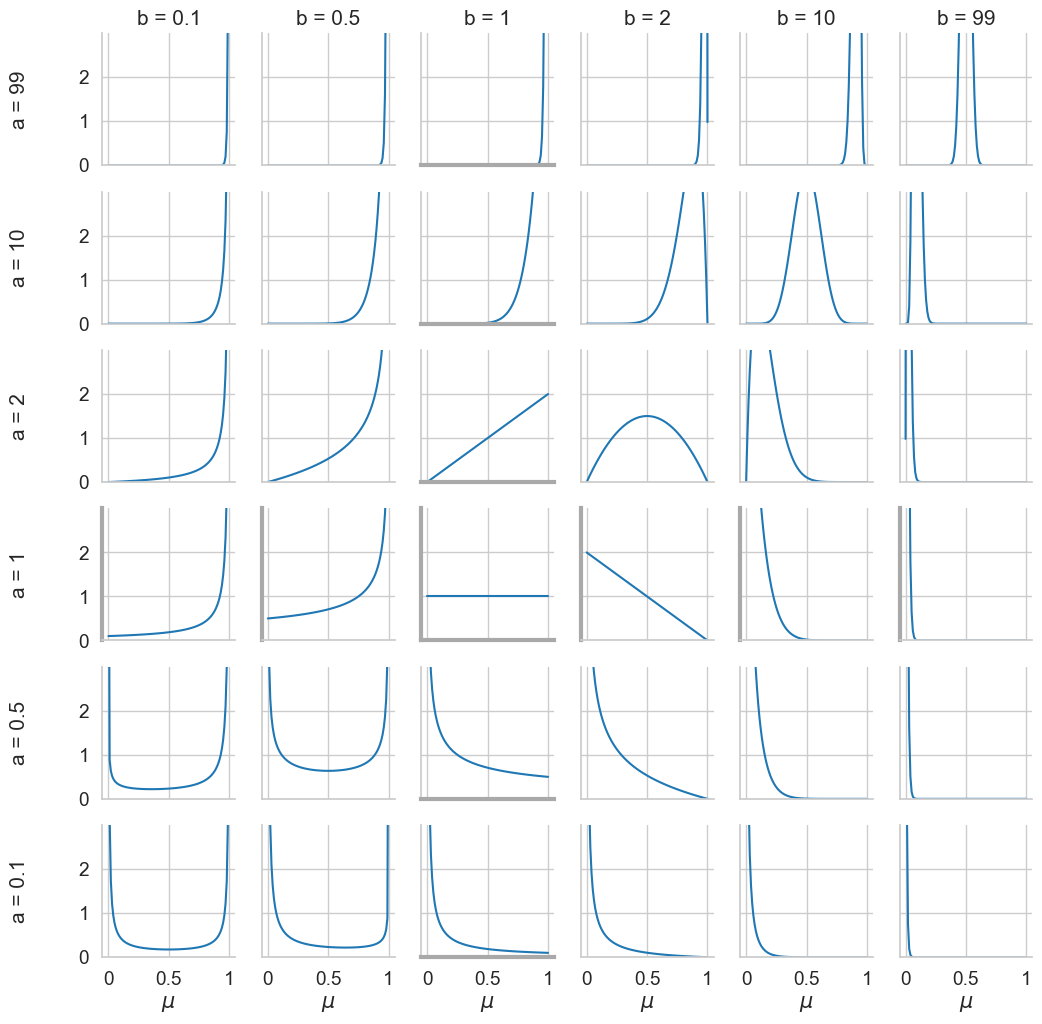

In [ ]:
agrid_G = np.asarray([0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
bgrid_H = np.asarray([0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
G = agrid_G.size
H = bgrid_H.size

mu_vals = np.linspace(0.0001, 0.9999, 101)

fig, axgrid = plt.subplots(nrows=len(agrid_G), ncols=len(bgrid_H), sharex=True, sharey=True, figsize=(12, 12));
axgrid = axgrid[::-1] # flip order of rows

for gg in range(G):
    for hh in range(H):
        
        # Form Beta distribution object using current a,b parameters
        cur_beta_dist = scipy.stats.beta(agrid_G[gg], bgrid_H[hh])
        
        # Evaluate Beta PDF at each candidate value of mu in "mu_vals"
        pdf_vals = cur_beta_dist.pdf(mu_vals)
            
        axgrid[gg, hh].plot(mu_vals, pdf_vals, '-')
        if hh == 0:
            axgrid[gg, hh].set_ylabel('a = %.2g\n\n' % agrid_G[gg]);
        if gg == G - 1:
            axgrid[gg, hh].set_title('b = %.2g' % bgrid_H[hh]);
        if gg == 0:
            axgrid[gg, hh].set_xlabel('$\mu$');

        if agrid_G[gg] == 1.0:
            axgrid[gg, hh].spines['left'].set_linewidth(3)
            axgrid[gg, hh].spines['left'].set_color('darkgray')
        if bgrid_H[hh] == 1.0:
            axgrid[gg, hh].spines['bottom'].set_linewidth(3)
            axgrid[gg, hh].spines['bottom'].set_color('darkgray')

H = 3.0
B = 0.05
sns.despine(fig)
axgrid[0,0].set_ylim(0, H); axgrid[0,0].set_yticks(np.arange(0, H, 1.0));
axgrid[0,0].set_xlim(-B, 1+ B); axgrid[0,0].set_xticks([0, 0.5, 1.0]); axgrid[0,0].set_xticklabels(['0', '0.5', '1']);

## Exercise 1a: Generate and display 20 samples from a Beta(10, 10)

In [ ]:
# TODO WRITE CODE to draw samples. 
# Hint: Use scipy.stats.beta's "rvs" method, which stands for "generate Random Variates"

a = 10
b = 10
mu_samples = [0, 0, 0] # FIXME scipy.stats.beta(a,b).rvs(...)

# TODO print out the values in a reasonable way

> <font color='red'> SOLUTION BELOW
</font>

In [ ]:
a = 10
b = 10
mu_samples = scipy.stats.beta(a,b).rvs(size=20, random_state=0)

np.set_printoptions(precision=3, suppress=True)

print(np.sort(mu_samples))

print(np.mean(mu_samples, keepdims=1))

[0.238 0.327 0.377 0.395 0.459 0.464 0.477 0.494 0.502 0.504 0.509 0.534
 0.546 0.549 0.584 0.597 0.603 0.625 0.707 0.762]
[0.513]


## Exercise 1b: Discuss the numerical values of these samples

* What do you notice about the mean of these samples? The range?
* How does what you see agree or disagree with the PDF visualizations we created above?

> <font color='red'> 
 Looking for: The average of the samples is close to 0.5, which matches the peak of the PDF function plotted above. 
 <br /> <br /> There is some variance around this mean, with samples ranging from around 0.2 to around 0.8.
 <br /> <br /> Yet there are very few points (likely none depending on your random sample) that come very close to the "edges" (either 0 or 1).
</font>



## Exercise 1c: Generate, display, and discuss 20 samples from a Beta(0.1, 0.1)

In [ ]:
# TODO WRITE CODE to draw samples. 
# Hint: Use scipy.stats.beta's "rvs" method, which stands for "generate Random Variates"

a = 0.1
b = 0.1
mu_samples = [0, 0, 0] # FIXME scipy.stats.beta(a,b).rvs(...)

# TODO print out the values in a reasonable way

> <font color='red'> SOLUTION CODE BELOW
</font>

In [ ]:
a = 0.1
b = 0.1
mu_samples = scipy.stats.beta(a,b).rvs(size=20, random_state=0)

np.set_printoptions(precision=3, suppress=True)
print(np.sort(mu_samples))

[0.    0.    0.    0.    0.    0.001 0.005 0.008 0.015 0.066 0.1   0.115
 0.247 0.48  0.733 0.883 0.909 0.963 0.983 1.   ]


Discussion:

> <font color='red'>
    Most samples are close to either 0 or 1 but they aren't completely stuck to the outer limits. Some values (like 0.1 or 0.48) are still close to the middle. This isn't surprising since the pdf is small but not zero even around 0.5.
</font>


## Exercise 1d: Generate, display, and discuss 20 samples from a Beta(0.001, 0.001)

> <font color='red'> SOLUTION CODE BELOW
</font>

In [ ]:
a = 0.001
b = 0.001
mu_samples = scipy.stats.beta(a,b).rvs(size=20, random_state=0)

np.set_printoptions(precision=3, suppress=True)
print(np.sort(mu_samples))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


Discussion:

> <font color='red'>
    All of the samples are essentially indistinguishable from either 0 or 1. This is a "bimodal" distribution. If you look at the PDF, there's essentially no density allocated between the two extremes, while there is near-infinite density at the extremes.
</font>


# Part 2: Posterior visualization in the Beta-Bernoulli model

We'll assume the model discussed in class

\begin{align}
p(\mu) &= \text{Beta}( \mu | a, b)
\\
p(x_1, \ldots x_N | \mu) &= \prod_{n=1}^N \text{BernPMF}( x_n | \mu)
\end{align}

## Exercise 2a: Calculating posterior parameters

Using the formulas discussed in the textbook / video lecture, complete the function below to determine the parameters of the Beta posterior distribution after seeing N coin flip binary outcomes in array `x_N`

In [ ]:
def calc_posterior_parameters(x_N, a, b):
    ''' Compute posterior parameters
    
    Args
    ----
    x_N : 1D array, size N
        Contains binary observations for each of N coin tosses
    a : float, positive
        Prior parameter, number of heads "pseudocounts"
    b : float, positive
        Prior parameter, number of tails "pseudocounts"
    
    Returns
    -------
    ahat : positive scalar
    bhat : positive scalar
    '''
    ahat = a # TODO fixme
    bhat = b # TODO fixme
    return ahat, bhat

> <font color='red'> SOLUTION CODE BELOW
</font>

In [ ]:
def calc_posterior_parameters(x_N, a, b):
    ''' Compute posterior parameters
    
    Args
    ----
    x_N : 1D array, size N
        Contains binary observations for each of N coin tosses
    a : float, positive
        Prior parameter, number of heads "pseudocounts"
    b : float, positive
        Prior parameter, number of tails "pseudocounts"
    
    Returns
    -------
    ahat : positive scalar
    bhat : positive scalar
    '''
    num_heads = np.sum(x_N)
    num_tails = len(x_N) - num_heads
    
    ahat = num_heads + a
    bhat = num_tails + b 
    return ahat, bhat

## Draw 'fake' data from model:  N observed flips for a coin with 78.9% proba heads

In [ ]:
# Define a random generator object, with specific seed for reproducibility
prng = np.random.RandomState(101)

# Settings
N = 10000   # num coin tosses to observe

a = 1.5      # prior num of heads
b = 1.5      # prior num of tails

# Pick a "true" mu value for data generation
true_mu = 0.789

# Sample N examples from Bernoulli given mu
x_N = scipy.stats.bernoulli(true_mu).rvs(size=N, random_state=prng)
# OR...
# x_N = prng.rand(N) < true_mu # another equivalent way to draw N samples from a Bernoulli with parameter 'true_mu'

## Exercise 2b: Visualizing Posterior given the *true*, uniform prior

Complete the code below, to visualize the posterior over mu for our "fake data" `x_N`

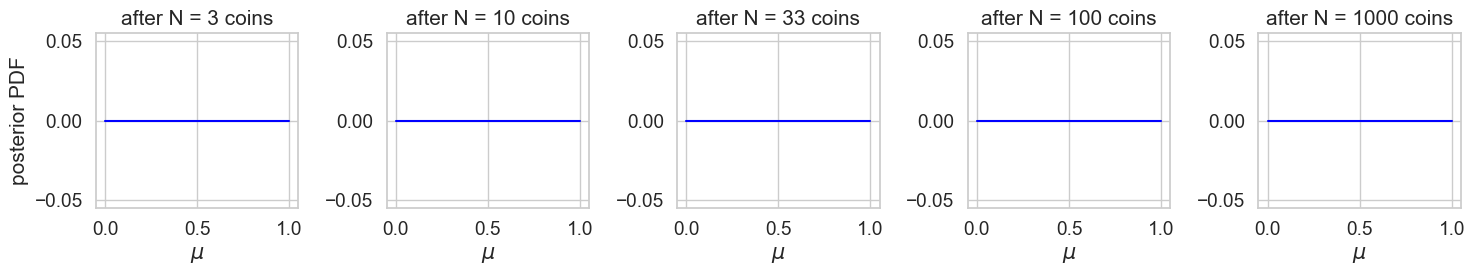

In [ ]:
Npartial_list = [3, 10, 33, 100, 1000]
L = len(Npartial_list)

fig, axgrid = plt.subplots(
    nrows=1, ncols=L,
    sharex=True, sharey=False,
    figsize=(3 * L, 3))

# Define a grid of mu values at which we'll evaluate the PDF
G = 201
mu_grid_G = np.linspace(0.0001, 0.9999, G)
for aa, Npartial in enumerate(Npartial_list):
    # Compute the parameters of the Beta posterior distribiution, using only first Npartial observations
    ahat, bhat = calc_posterior_parameters(x_N[:Npartial], a, b)

    # Call the PDF function built into scipy.stats.beta, using ahat and bhat as parameters
    # Make sure you evaluate the PDF for each of the G values in the mu_grid_G array
    pdf_grid_G = np.zeros(G) # TODO FIXME
    
    axgrid[aa].plot(mu_grid_G, pdf_grid_G, 'b-')
    axgrid[aa].set_title("after N = %d coins" % Npartial)
    axgrid[aa].set_xlabel(r'$\mu$');
    if aa == 0:
        axgrid[aa].set_ylabel('posterior PDF');
plt.tight_layout();

> <font color='red'> SOLUTION CODE BELOW
</font>

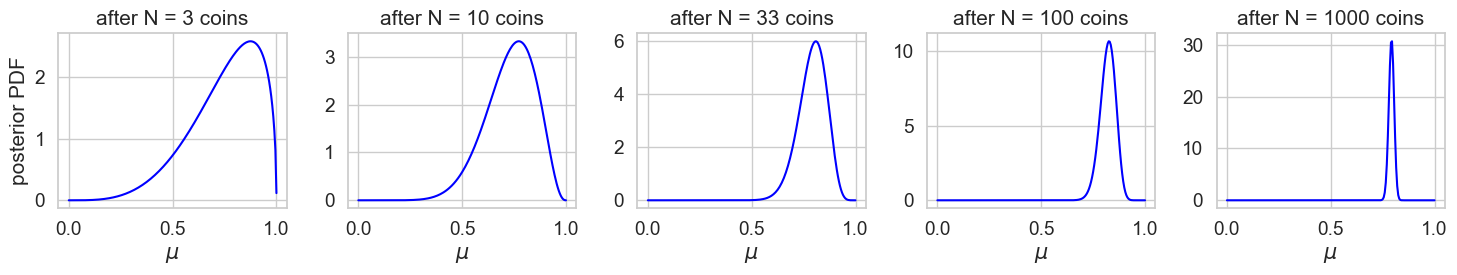

In [ ]:
Npartial_list = [3, 10, 33, 100, 1000]
L = len(Npartial_list)

fig, axgrid = plt.subplots(
    nrows=1, ncols=L,
    sharex=True, sharey=False,
    figsize=(3 * L, 3))

# Define a grid of mu values at which we'll evaluate the PDF
G = 201
mu_grid_G = np.linspace(0.0001, 0.9999, G)
for aa, Npartial in enumerate(Npartial_list):
    # Compute the parameters of the Beta posterior distribiution, using only first Npartial observations
    ahat, bhat = calc_posterior_parameters(x_N[:Npartial], a, b)

    # Call the PDF function built into scipy.stats.beta, using ahat and bhat as parameters
    # Make sure you evaluate the PDF for each of the G values in the mu_grid_G array
    pdf_grid_G = scipy.stats.beta.pdf(mu_grid_G, ahat,bhat) 
    
    axgrid[aa].plot(mu_grid_G, pdf_grid_G, 'b-')
    axgrid[aa].set_title("after N = %d coins" % Npartial)
    axgrid[aa].set_xlabel(r'$\mu$');
    if aa == 0:
        axgrid[aa].set_ylabel('posterior PDF');
plt.tight_layout();

## Discussion 2c : As N gets larger, what happens to the posterior? 

* How does this compare to what happens to the ML estimator? 
* How does this relate to the "true" mu value that generated the data?

> <font color='red'>
    As N gets larger the posterior gets more and more concentrated around a single point, placing nearly all its probability mass within a small interval around its peak.
    <br /> <br /> The location of the peak is very nearly the value of the true mu used to generate the data
</font>




In [ ]:
true_mu

0.789

## Exercise 2d: Visualizing Posterior given a misinformed prior


Repeat Exercise 2b using the *same* fake data, but act as if your prior was instead $a=3, b=20$ (in other words, quite confident in prior belief that the coin would be tails rather than heads.

This is a **misinformed** prior, because in reality the chance of a heads is 78.9%

Visualize the posterior over mu for our "fake data" `x_N`, after seeing each of the Npartial examples as in 2b.

In [ ]:
abad =  3
bbad = 20

# TODO adapt code from Exercise 2b, produce a row plot of 7 subplots, one for each Npartial value

> <font color='red'> SOLUTION CODE BELOW
</font>

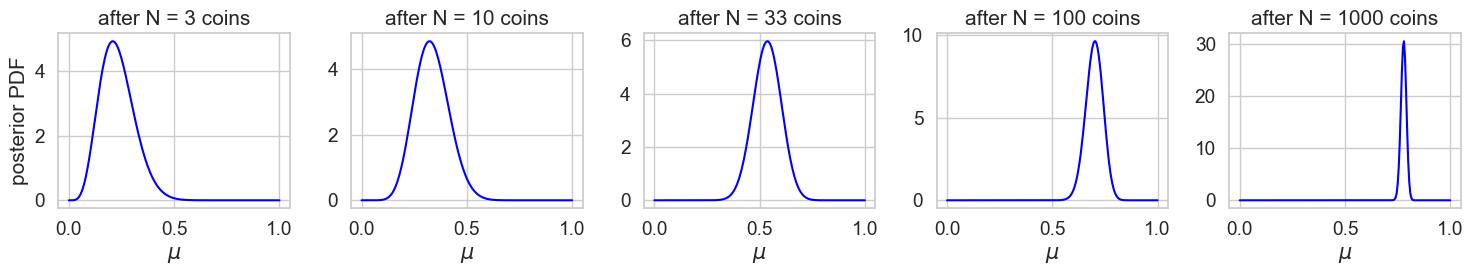

In [ ]:
Npartial_list = [3, 10, 33, 100, 1000]
L = len(Npartial_list)

fig, axgrid = plt.subplots(
    nrows=1, ncols=L,
    sharex=True, sharey=False,
    figsize=(3 * L, 3))

# Define a grid of mu values at which we'll evaluate the PDF
G = 201
mu_grid_G = np.linspace(0.0001, 0.9999, G)
for aa, Npartial in enumerate(Npartial_list):
    # Compute the parameters of the Beta posterior distribiution, using only first Npartial observations
    #                                  only change is here vvvvvvvvvv
    ahat, bhat = calc_posterior_parameters(x_N[:Npartial], abad, bbad)

    # Call the PDF function built into scipy.stats.beta, using ahat and bhat as parameters
    # Make sure you evaluate the PDF for each of the G values in the mu_grid_G array
    pdf_grid_G = scipy.stats.beta.pdf(mu_grid_G, ahat, bhat) 
    
    axgrid[aa].plot(mu_grid_G, pdf_grid_G, 'b-')
    axgrid[aa].set_title("after N = %d coins" % Npartial)
    axgrid[aa].set_xlabel(r'$\mu$');
    if aa == 0:
        axgrid[aa].set_ylabel('posterior PDF');
plt.tight_layout();

## Discussion 2e: Does having a misinformed prior matter?

Discuss how your answer might depend on the amount of available data.

*Hint*: Consider the formulas for the parameters of the posterior distribution
$$\hat{a} = h + a \hspace{1cm} \hat{b} = t + b$$
where $a$ and $b$ are the parameters of the prior and $h$ and $t$ is the number of observed heads and tails respectively.


> <font color='red'>
    From these formulas you may notice that importance of the prior is related to the size of $a$ and $b$ compared to $h$ and $t$. This is also visible in the plots for the posteriors. When there are few observed datapoints the distribution is closer to the prior (the prior would be *exactly* visible if we plotted the case that N=0). As the number of observed coin flips becomes much larger than $a$ and $b$ the posterior using the misinformed prior converges towards the same distribution as in the earlier case with the uniform prior, concentrated near the true mu.
</font>




